# Machine Learning Project using a wine quality dataset
This machine learning project is to practice making a full end to end project. The dataset are related to red variant of the Portuguese "Vinho Verde" wine. I will use this data to find a relation between what aspect of the wine affects the percived quality of the wine. I will plot the data against the data under the "quality" column to show what does or does not affect the quality rating. 
## Kaggle link to the dataset:
Red Wine Quality https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 

##Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clasification libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

## Load and check data

In [2]:
# This lne is to allow me to upload the csv file to google colab
from google.colab import files
upload = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [3]:
# The line to rename the uploaded file
red_wine_q = pd.read_csv("winequality-red.csv", encoding = "unicode_escape")

In [4]:
# This is to check that the data set has been imported correctly
red_wine_q.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Getting info on the data set that is stored
red_wine_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##EDA
###This should check for:

*   X and Y relationships
*   Amounts
*   Distribrutions
*   Proportions
*   Correlations
*   Uncertainty


In [6]:
# Getting the different values, like min, max, etc.
red_wine_q.describe().round(3).transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.320,1.741,4.600,7.100,7.900,9.200,15.900
volatile acidity,1599.0,0.528,0.179,0.120,0.390,0.520,0.640,1.580
citric acid,1599.0,0.271,0.195,0.000,0.090,0.260,0.420,1.000
residual sugar,1599.0,2.539,1.410,0.900,1.900,2.200,2.600,15.500
chlorides,1599.0,0.087,0.047,0.012,0.070,0.079,0.090,0.611
free sulfur dioxide,1599.0,15.875,10.460,1.000,7.000,14.000,21.000,72.000
total sulfur dioxide,1599.0,46.468,32.895,6.000,22.000,38.000,62.000,289.000
density,1599.0,0.997,0.002,0.990,0.996,0.997,0.998,1.004
pH,1599.0,3.311,0.154,2.740,3.210,3.310,3.400,4.010
sulphates,1599.0,0.658,0.170,0.330,0.550,0.620,0.730,2.000


In [7]:
# Find missing values, features and unique values
print("n\Features: \n", red_wine_q.columns.tolist())
print("\nMissing values: ", red_wine_q.isnull().sum().values.sum())
print("\nUnique Values: \n", red_wine_q.nunique())

n\Features: 
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Missing values:  0

Unique Values: 
 fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64


In [8]:
# Correlation table
red_wine_q.corr().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


No handles with labels found to put in legend.


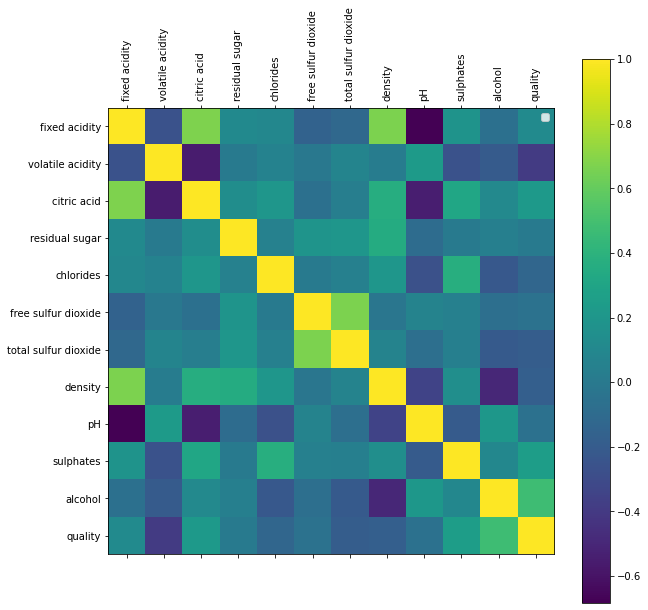

In [9]:
def plot_corr(red_wine_q,size=10):
  corr = red_wine_q.corr()
  fig,ax = plt.subplots(figsize = (size,size))
  ax.legend()
  cax = ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)), corr.columns, rotation = "vertical")
  plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(red_wine_q)

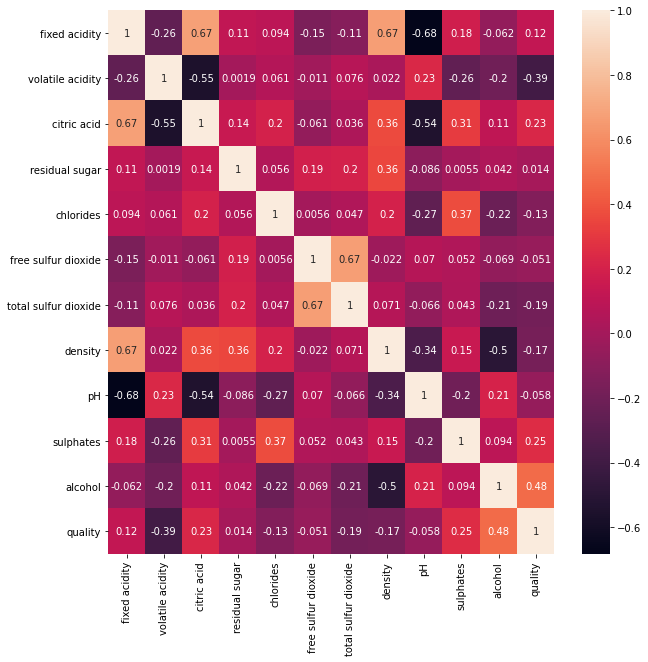

In [11]:
# Created a heatmap here
plt.figure(figsize=(10, 10))
sns.heatmap(red_wine_q.corr(), annot=True)

###Histograms: Distributions

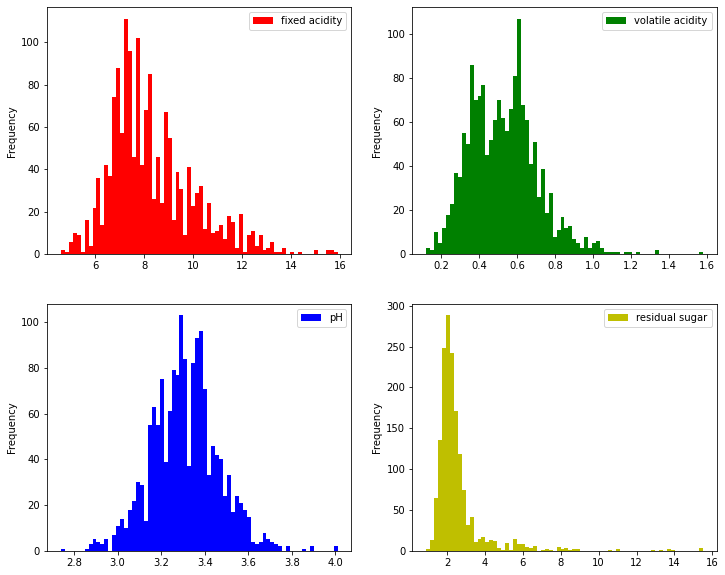

In [12]:
# Creating histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
red_wine_q.plot(kind="hist", y = "fixed acidity", bins = 70, color = "r", ax = axes[0,0])
red_wine_q.plot(kind="hist", y = "volatile acidity", bins = 70, color = "g", ax = axes[0,1])
red_wine_q.plot(kind="hist", y = "pH", bins = 70, color = "b", ax = axes[1,0])
red_wine_q.plot(kind="hist", y = "residual sugar", bins = 70, color = "y", ax = axes[1,1])

###Bar Graphs: Comparisons

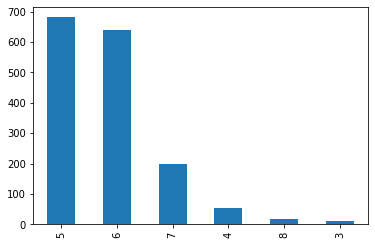

In [13]:
# Comparing how many red wines are rated at the same quality
red_wine_q["quality"].value_counts().plot(kind = "bar")

###Scatterplot: X and Y relationship

'Finish after the internet come back....'

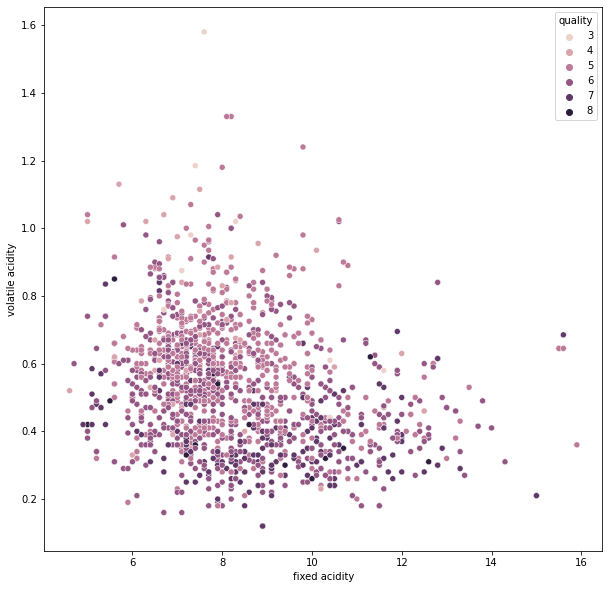

In [15]:
# Show the relationship between the engine size and the price, and also see if it changes from a standard engine to a turbo powered one
plt.figure(figsize=(10, 10))
sns.scatterplot(data = red_wine_q, x = "fixed acidity", y = "volatile acidity", hue = "quality");
'''Finish after the internet come back....'''

"The second graph dosen't seem to provide any useful info...."

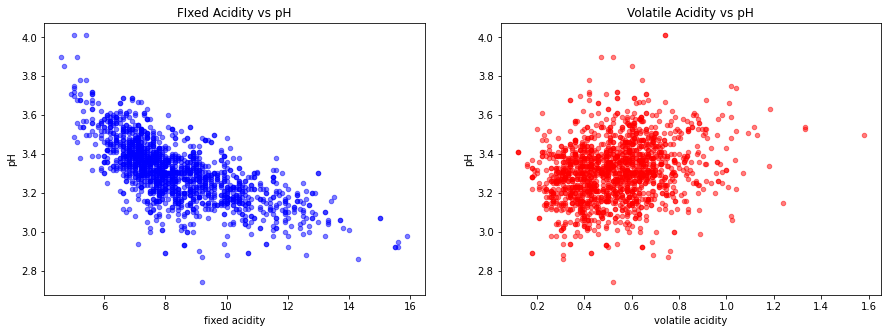

In [21]:
# This shows how and if the engine size and the horse power affects the car prices, in separate graphs 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
red_wine_q.plot(kind="scatter", x="fixed acidity", y="pH", alpha=0.5, color="blue", ax = axes[0], title= "FIxed Acidity vs pH")
red_wine_q.plot(kind="scatter", x="volatile acidity", y="pH", alpha=0.5, color="red", ax = axes[1], title= "Volatile Acidity vs pH")
'''The second graph dosen't seem to provide any useful info....'''

###Displot

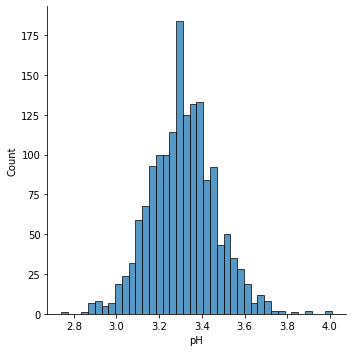

In [22]:
# This shows the distrubrution of the amount of cars that have a certain engine size
sns.displot(red_wine_q["pH"])

###Violin Graph

'I dont think this was useful either'

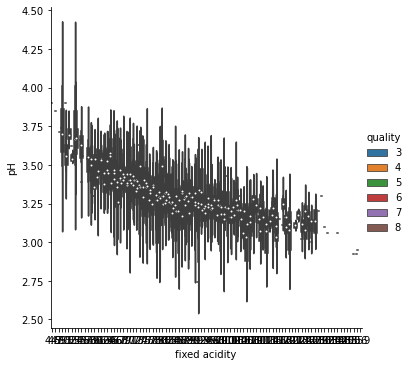

In [26]:
# This shows how the car price is affected by the fuel type and number of those cars that are standard versus turbo 
sns.catplot(x = "fixed acidity", y = "pH", hue = "quality",
            kind = "violin", data = red_wine_q)
'''I dont think this was useful either'''

###Ticks Graph

In [28]:
# Still nuh kno wah dis needed fah but whatever 5:45 - 7:53
sns.set(style = "ticks")
sns.pairplot(red_wine_q, hue = "quality")
plt.title("Quality")

Output hidden; open in https://colab.research.google.com to view.

##Data Proccessing Feature Engineering

###Detecting Missing Data

In [29]:
# Literally just replacing the empty spaces with the word "NaN"
red_wine_q = red_wine_q.replace(" ", np.nan)
red_wine_q.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###Treating Missing Data

In [30]:
# This is supposed to how many missing values there are but thank god there are none. (Miss, I just picked a random one btw this is 100% not on purpose)
print(red_wine_q.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# There is more to be done after this for missing data if there any. But I'm sure you kno wthis right?
# !Update! There were no missing data

###Detecting and Treating Duplicates

In [31]:
#Find the size of the datasheet
red_wine_q.shape

(1599, 12)

In [32]:
# Find the number of duplicated rows
dup_r_red_wine_q = red_wine_q[red_wine_q.duplicated()]
print("The number of rows duplicated are: ", dup_r_red_wine_q.shape)

The number of rows duplicated are:  (240, 12)


In [34]:
# Show the number of values present before dropping the dupes
red_wine_q.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [35]:
# Here I Drop the dupe rows
red_wine_q = red_wine_q.drop_duplicates()
red_wine_q.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [36]:
# Show the number of values present in the datasheet after droping the dupe rows
red_wine_q.count()

fixed acidity           1359
volatile acidity        1359
citric acid             1359
residual sugar          1359
chlorides               1359
free sulfur dioxide     1359
total sulfur dioxide    1359
density                 1359
pH                      1359
sulphates               1359
alcohol                 1359
quality                 1359
dtype: int64

###Feature Scaling

In [37]:
# Import the Standard scaler thing
from sklearn.preprocessing import StandardScaler

In [38]:
# Here I use the Standard scaler on the data set
scale = StandardScaler()
scale.fit(red_wine_q)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
# Here I attach the tranforms scaled data set to the varible name (cmbk_pred_scale)
red_wine_q_scale = scale.transform(red_wine_q)

In [40]:
# Show the scaled data
red_wine_q_scale

array([[-0.52443096,  0.93200015, -1.39325797, ..., -0.57856134,
        -0.95437429, -0.7570404 ],
       [-0.29406274,  1.91580043, -1.39325797, ...,  0.12482157,
        -0.5845748 , -0.7570404 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.05102416,
        -0.5845748 , -0.7570404 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  0.59374351,
         0.7097234 ,  0.45762065],
       [-1.38831178,  0.63139451, -0.77933603, ...,  0.3006673 ,
        -0.21477532, -0.7570404 ],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.00759108,
         0.52482366,  0.45762065]])

###Categorical Variable Encoding
'''I not so sure about this part yet so I'll do some research when I get internet back'''

###Split Data into X & y variables (Start of cassification?)

In [41]:
# I think this means that pandas ".iloc" expexts row_indexer, column_indexer (I am honestly confused)
X = red_wine_q.drop("quality", axis=1) #iloc[:,:-1].values

In [43]:
y = red_wine_q['quality']

###Split Data into Training and Test Sets

In [44]:
# Test size specifies how much of the data you want to set aside for the testing set.
# Random_state parameter is just a random seed we can use.
# You can use it if you'd like to reproduce these specific results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [45]:
print(X_train)
print(y_train)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
208             7.8              0.44         0.28  ...  3.22       0.67      9.4
1386            7.4              0.64         0.07  ...  3.30       0.58      9.6
828             7.8              0.57         0.09  ...  3.46       0.74     12.7
1150            8.2              0.33         0.32  ...  3.30       0.76     12.8
111             8.4              0.62         0.09  ...  3.15       0.66      9.8
...             ...               ...          ...  ...   ...        ...      ...
1230            7.7              0.18         0.34  ...  3.37       0.78     11.8
1549            7.4              0.36         0.30  ...  3.24       0.70     11.4
874            10.4              0.38         0.46  ...  3.12       0.65     11.8
624             6.8              0.69         0.00  ...  3.46       0.72     10.2
1225            9.2              0.46         0.23  ...  3.15       0.51      9.4

[1087 rows x 11

###Choose and Train an Estimator (Algorithm)

In [46]:
from sklearn.svm import SVC

In [47]:
# Create a SVC model
SVC_model = SVC()

In [48]:
SVC_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [52]:
# Attempting to fit the classifiers
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

###Evaluate Model

In [54]:
# Now I try to use the fitted model to predict
SVC_pred = SVC_model.predict(X_test)

In [55]:
# SVC Accuracy score
print(accuracy_score(SVC_pred, y_test))

0.5330882352941176


In [56]:
# print a confusion matrix
print(confusion_matrix(SVC_pred, y_test))

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  4 58 20  0  1]
 [ 2  6 67 87 25  2]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]


In [53]:
# Predicting and sotring that prediction in a variable
KNN_prediction = KNN_model.predict(X_test)

In [57]:
# Now I check for accuracy
print(accuracy_score(KNN_prediction, y_test))

0.47794117647058826


In [58]:
# Now I check the confusion matrix and classification report to see the performance of the predictions
print(classification_report(KNN_prediction, y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.64      0.53      0.58       150
           6       0.44      0.45      0.44       105
           7       0.12      0.21      0.15        14
           8       0.00      0.00      0.00         0

    accuracy                           0.48       272
   macro avg       0.20      0.20      0.20       272
weighted avg       0.53      0.48      0.50       272



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Or miss way that I noted in the DMR prolect

###Dimensionality Reduction

In [63]:
# Import the pca libraries here
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=2)

In [66]:
# Here I think I fit the data set to the pca?
pca.fit(red_wine_q_scale)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [68]:
# Here I think the data is transformed and attatched to the name (x_pca)
x_pca_redw = pca.transform(red_wine_q_scale)

In [69]:
# Print the shape beforee transformation
red_wine_q_scale.shape

(1359, 12)

In [70]:
# Print the sahep after the transformation
x_pca_redw.shape

(1359, 2)

In [73]:
red_wine_q_scale

array([[-0.52443096,  0.93200015, -1.39325797, ..., -0.57856134,
        -0.95437429, -0.7570404 ],
       [-0.29406274,  1.91580043, -1.39325797, ...,  0.12482157,
        -0.5845748 , -0.7570404 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.05102416,
        -0.5845748 , -0.7570404 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  0.59374351,
         0.7097234 ,  0.45762065],
       [-1.38831178,  0.63139451, -0.77933603, ...,  0.3006673 ,
        -0.21477532, -0.7570404 ],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.00759108,
         0.52482366,  0.45762065]])

In [74]:
x_pca_redw

array([[-1.76660297,  1.18690342],
       [-0.94933965,  2.04660494],
       [-0.88480511,  1.39158352],
       ...,
       [-2.08564659, -0.3764463 ],
       [-2.32779035,  0.70263031],
       [-0.30019612, -1.25425222]])

Text(0, 0.5, 'Second principle comnpent')

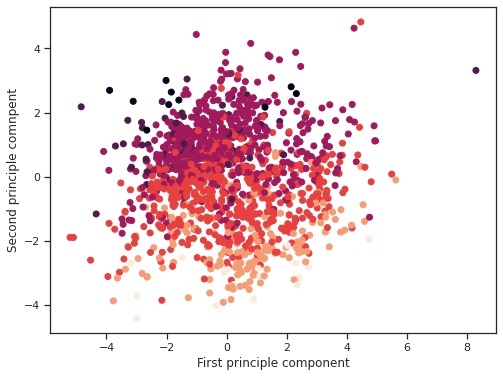

In [76]:
plt.figure(figsize = (8, 6))
plt.scatter(x_pca_redw[:,0], x_pca_redw[:,1], c = red_wine_q["quality"])
plt.xlabel("First principle component")
plt.ylabel("Second principle comnpent")

###Fine Tune the Model

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [79]:
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe
Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [80]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer

In [81]:
make_pipeline(Binarizer(), MultinomialNB())
Pipeline(steps=[('binarizer', Binarizer()), ('multinomialnb', MultinomialNB())])

Pipeline(memory=None,
         steps=[('binarizer', Binarizer(copy=True, threshold=0.0)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)